In [ ]:
import urllib.request

url = 'https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=1'  # Use dl=1 to directly download without viewing in the browser
destination = 'dataset.zip'

urllib.request.urlretrieve(url, destination)


In [ ]:
import zipfile

with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('')  # Extract the contents to the current directory


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import cv2
from keras.models import model_from_json
import numpy as np


In [ ]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)


#ImageDataGenerator- preprocessing module for generating batches of augmented or preprocessed image data.

# creates an instance of the ImageDataGenerator class called train_data_gen for generating batches of training data. 
#The rescale parameter is set to 1./255, which means that each pixel value in the images will be rescaled to the range [0, 1]. 
#This rescaling is a common preprocessing step in deep learning to normalize the pixel values, as it helps improve convergence during training and can lead to better performance of the model.

In [ ]:
train_generator = train_data_gen.flow_from_directory(
	'train',
	target_size=(48, 48),    #specifies the dimensions to which the input images will be resized
	batch_size=64,           #size of the batches of images that will be generated during training. In this case, each batch will contain 64 images.
	color_mode="grayscale",
	class_mode='categorical') #specifies the type of labels that will be generated for the images. Setting it to 'categorical' 
                               #indicates that the labels will be represented as one-hot encoded vectors


In [ ]:
validation_generator = validation_data_gen.flow_from_directory(
		'test',
		target_size=(48, 48),
		batch_size=64,
		color_mode="grayscale",
		class_mode='categorical')


In [ ]:
emotion_model = Sequential()       #initializes a sequential model, allowing layers to be added sequentially.

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
						input_shape=(48, 48, 1)))                   #adds a 2D convolutional layer with 32 filters, each with a 3x3 kernel size, ReLU activation function,
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))                                    #This adds dropout regularization with a rate of 25% to prevent overfitting.

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())           #flattens the output of the previous layer into a one-dimensional array.
emotion_model.add(Dense(1024, activation='relu')) #adds a fully connected layer with 1024 neurons and ReLU activation.
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))  #output layer

emotion_model.summary()  #prints a summary of the model architecture, including the type of each layer, the output shape, and the number of trainable parameters.

cv2.ocl.setUseOpenCL(False)

initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000,
							decay_rate=0.96) #creates a learning rate schedule using exponential decay, which decreases the learning rate over time.

optimizer = Adam(learning_rate=lr_schedule)

emotion_model.compile(loss='categorical_crossentropy', optimizer=optimizer,
					metrics=['accuracy'])
#loss function as categorical cross-entropy (suitable for multi-class classification)

In [ ]:
emotion_model_info = emotion_model.fit_generator(
		train_generator,
		steps_per_epoch=28709 // 64,
		epochs=30,
		validation_data=validation_generator,
		validation_steps=7178 // 64)


In [9]:
emotion_model.evaluate(validation_generator)


NameError: name 'emotion_model' is not defined

In [ ]:
accuracy = emotion_model_info.history['accuracy']
val_accuracy = emotion_model_info.history['val_accuracy']
loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']


NameError: name 'accuracy' is not defined

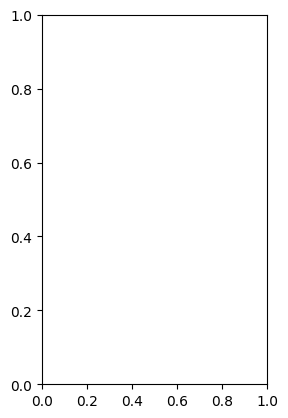

In [8]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# loss graph
plt.subplot(1, 2, 2)
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:

model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
	json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('emotion_model.h5')


#The HDF5 file format is commonly used for storing large numerical datasets and is suitable for saving the parameters (weights) of deep learning models.
#The weights are saved separately from the model architecture because they may be reused or transferred to another model with a compatible architecture.

In [ ]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful",
				3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}


In [19]:
from tensorflow.keras.models import model_from_json
json_file = open('emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)


In [ ]:
!pip install opencv-python==4.7.0.68


In [ ]:
# import cv2
# import numpy as np

# cap=cv2.VideoCapture(0,cv2.CAP_DSHOW)
# while True:
#     # Find haar cascade to draw bounding box around face
#     ret, frame = cap.read()
#     print("Retrieved frame:", ret)  # Add this line to check the value of ret
#     frame = cv2.resize(frame, (1280, 720))
#     if not ret:
#         print(ret)
#         continue

#     # Create a face detector
#     face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#     gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # detect faces available on camera
#     num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

#     # take each face available on the camera and Preprocess it
#     for (x, y, w, h) in num_faces:
#         cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
#         roi_gray_frame = gray_frame[y:y + h, x:x + w]
#         cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

#         # predict the emotions
#         emotion_prediction = emotion_model.predict(cropped_img)
#         maxindex = int(np.argmax(emotion_prediction))
#         cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

#     cv2.imshow('Emotion Detection', frame)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()


In [ ]:
# import cv2
# import numpy as np
# from keras.models import model_from_json

# # Load the pre-trained facial emotion recognition model from the JSON file
# with open('emotion_model.json', 'r') as json_file:
#     loaded_model_json = json_file.read()
# emotion_model = model_from_json(loaded_model_json)
# # Load weights into the model
# emotion_model.load_weights("emotion_model.h5")  # Assuming weights are stored in emotion_model.h5

# # Define emotion labels
# emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}



# cap=cv2.VideoCapture(0,cv2.CAP_DSHOW)
# while True:
#     # Find haar cascade to draw bounding box around face
#     ret, frame = cap.read()
#     print("Retrieved frame:", ret)  # Add this line to check the value of ret
#     # frame = cv2.resize(frame, (1280, 720))
#     frame = cv2.resize(frame, (500,300))
#     if not ret:
#         print(ret)
#         continue

#     # Create a face detector
#     face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

#     gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # detect faces available on camera
#     num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

#     # take each face available on the camera and Preprocess it
#     for (x, y, w, h) in num_faces:
#         cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
#         roi_gray_frame = gray_frame[y:y + h, x:x + w]
#         cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

#         # predict the emotions
#         emotion_prediction = emotion_model.predict(cropped_img)
#         maxindex = int(np.argmax(emotion_prediction))
#         cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

#     cv2.imshow('Emotion Detection', frame)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()


In [ ]:
# import cv2
# import numpy as np
# from keras.models import model_from_json

# # Load the pre-trained facial emotion recognition model from the JSON file
# with open('emotion_model.json', 'r') as json_file:
#     loaded_model_json = json_file.read()
# emotion_model = model_from_json(loaded_model_json)
# # Load weights into the model
# emotion_model.load_weights("emotion_model.h5")  # Assuming weights are stored in emotion_model.h5

# # Define emotion labels
# emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}

# # Create a face detector
# face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# # Initialize the video capture object
# cap = cv2.VideoCapture(0)

# # Check if the camera is opened successfully
# if not cap.isOpened():
#     print("Error: Unable to open camera.")
#     exit()

# # Loop for capturing and processing frames
# while True:
#     # Read a frame from the camera
#     ret, frame = cap.read()
    
#     # Check if the frame is retrieved successfully
#     if not ret:
#         print("Error: Unable to retrieve frame.")
#         break
    
#     # Resize the frame
#     frame = cv2.resize(frame, (500, 300))
    
#     # Convert the frame to grayscale
#     gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # Detect faces in the frame
#     num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

#     # Process each detected face
#     for (x, y, w, h) in num_faces:
#         cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
#         roi_gray_frame = gray_frame[y:y + h, x:x + w]
#         cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

#         # Predict emotions
#         emotion_prediction = emotion_model.predict(cropped_img)
#         maxindex = int(np.argmax(emotion_prediction))
#         cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

#     # Display the processed frame
#     cv2.imshow('Emotion Detection', frame)
    
#     # Check for key press to exit
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the video capture object and close all windows
# cap.release()
# cv2.destroyAllWindows()


In [ ]:
# import cv2
# import numpy as np
# from keras.models import model_from_json
# import time

# # Load the pre-trained facial emotion recognition model from the JSON file
# with open('emotion_model.json', 'r') as json_file:
#     loaded_model_json = json_file.read()
# emotion_model = model_from_json(loaded_model_json)
# # Load weights into the model
# emotion_model.load_weights("emotion_model.h5")  # Assuming weights are stored in emotion_model.h5

# # Define emotion labels
# emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}

# # Create a face detector
# face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# # Initialize the video capture object
# cap = cv2.VideoCapture(0)

# # Check if the camera is opened successfully
# if not cap.isOpened():
#     print("Error: Unable to open camera.")
#     exit()

# # Loop for capturing and processing frames
# start_time = time.time()
# emotion_captured = False
# while time.time() - start_time < 5:
#     # Read a frame from the camera
#     ret, frame = cap.read()
    
#     # Check if the frame is retrieved successfully
#     if not ret:
#         print("Error: Unable to retrieve frame.")
#         break
    
#     # Resize the frame
#     frame = cv2.resize(frame, (500, 300))
    
#     # Convert the frame to grayscale
#     gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # Detect faces in the frame
#     num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

#     # Process each detected face
#     for (x, y, w, h) in num_faces:
#         cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
#         roi_gray_frame = gray_frame[y:y + h, x:x + w]
#         cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

#         # Predict emotions
#         emotion_prediction = emotion_model.predict(cropped_img)
#         maxindex = int(np.argmax(emotion_prediction))
#         cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
        
#         # Print emotion in the terminal
#         if not emotion_captured:
#             print("Emotion detected:", emotion_dict[maxindex])
#             emotion_captured = True

#     # Display the processed frame
#     cv2.imshow('Emotion Detection', frame)
    
#     # Check for key press to exit
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the video capture object and close all windows
# cap.release()
# cv2.destroyAllWindows()


In [20]:
import cv2
import numpy as np
from keras.models import model_from_json
import time

# Load the pre-trained facial emotion recognition model from the JSON file
with open('emotion_model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
emotion_model = model_from_json(loaded_model_json)
# Load weights into the model
emotion_model.load_weights("emotion_model.h5")  # Assuming weights are stored in emotion_model.h5

# Define emotion labels
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}

# Create a face detector
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Initialize the video capture object
cap = cv2.VideoCapture(0)

# Check if the camera is opened successfully
if not cap.isOpened():
    print("Error: Unable to open camera.")
    exit()

# Initialize variables to track emotions and time
start_time = time.time()
emotion_count = {label: 0 for label in emotion_dict.values()}

# Loop for capturing and processing frames
while time.time() - start_time < 5:
    # Read a frame from the camera
    ret, frame = cap.read()
    
    # Check if the frame is retrieved successfully
    if not ret:
        print("Error: Unable to retrieve frame.")
        break
    
    # Resize the frame
    frame = cv2.resize(frame, (500, 300))
    
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # Process each detected face
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)

        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # Predict emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        emotion_label = emotion_dict[maxindex]
        
        # Update emotion count
        emotion_count[emotion_label] += 1

    # Display the processed frame
    cv2.imshow('Emotion Detection', frame)
    
    # Check for key press to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Determine the most dominant emotion detected within the 5-second window
max_emotion = max(emotion_count, key=emotion_count.get)

# Display the most dominant emotion
print("Most dominant emotion within 5 seconds:", max_emotion)

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 21ms/step
Most dominant emotion within 5 seconds: Happy


In [21]:




if max_emotion == "Fearful" or max_emotion == "Disgusted":
    max_emotion = "Calm"
elif max_emotion == "Happy" or max_emotion == "Sad" or max_emotion == "Neutral":
    max_emotion = "Intense"
elif max_emotion == "Angry" or max_emotion == "Surprised":
    max_emotion = "Intense"

user_emotion=max_emotion


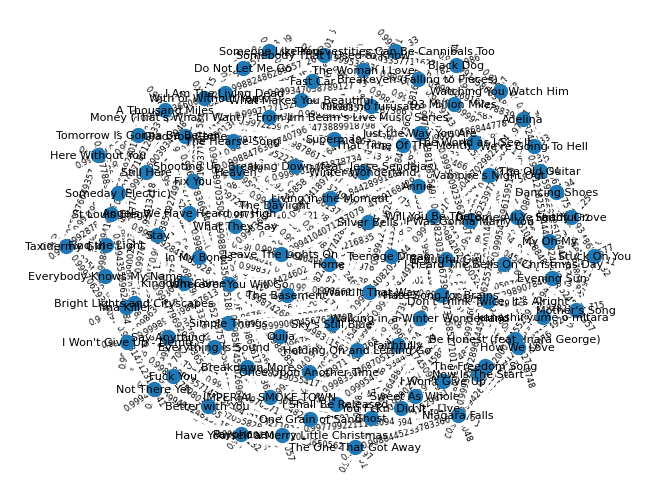

In [22]:

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity


# Read the CSV file into a DataFrame
df = pd.read_csv('small.csv')

# Features to be used for similarity calculation
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Create a graph
G = nx.Graph()

# Add nodes for each song
for idx, row in df.iterrows():
    G.add_node(row['track_name'], emotion=row['emotion'])

# Calculate similarity based on Euclidean distance
def calculate_similarity(song1, song2):
    # Select features for the two songs
    features1 = [song1[feature] for feature in features]
    features2 = [song2[feature] for feature in features]

    # Calculate Euclidean distance as dissimilarity metric
    similarity = cosine_similarity([features1], [features2])[0][0]
    return similarity

# Add edges between songs based on similarity
for i in range(len(df)):
    for j in range(i+1, len(df)):
        similarity = calculate_similarity(df.iloc[i], df.iloc[j])
        if similarity > 0.11:  # Adjust this threshold based on your needs
            G.add_edge(df.iloc[i]['track_name'], df.iloc[j]['track_name'], weight=similarity)

# Visualization
pos = nx.spring_layout(G)  # Positioning nodes using spring layout algorithm
nx.draw(G, pos, with_labels=True, font_size=8, node_size=100)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)
plt.show()

import networkx as nx

# Assuming G is your graph object

# Save the graph to a file
nx.write_graphml(G, "graph_data.graphml")


In [23]:
# print(user_emotion)

import networkx as nx

# Read the graph from the saved GraphML file
G = nx.read_graphml("graph_data.graphml")

def get_similar_songs(user_emotion):
    # List to store songs related to user's emotion
    related_songs = []

    # Find songs related to user's emotion
    for node, data in G.nodes(data=True):
        if user_emotion.lower() == data["emotion"].lower():
            related_songs.append(node)

    # If no songs found for the user's emotion
    if not related_songs:
        return "No songs found for the given emotion."

    # List to store similar songs
    similar_songs = []

    # Find similar songs for each related song
    for song in related_songs:
        neighbors = list(G.neighbors(song))
        for neighbor in neighbors:
            if neighbor not in similar_songs and neighbor not in related_songs:
                similar_songs.append(neighbor)

    for recommended_song in similar_songs:
        print(recommended_song)            
    
    # Return top 10 similar songs
    return related_songs[:5]


# Example usage:
user_emotion = "happy"
similar_songs = get_similar_songs(user_emotion)
print(similar_songs)


93 Million Miles
Sky's Still Blue
What They Say
Dancing Shoes
Living in the Moment
Say Anything
Money (That's What I Want) - From Jim Beam's Live Music Series
The Woman I Love
I Shall Be Released
Transvestities Can Be Cannibals Too
One Grain of Sand
Winter Wonderland
Stuck On You
Ouija
Watching You Watch Him
Be Honest (feat. Inara George)
Ima Killer
Everybody Knows My Name
Still Here
Breakdown More
Fix You
Everything Is Sound
Leave The Lights On
We're Going To Hell
Now Is The Start
The World as I See It
Fuck You
Shooting Up, Breaking Down (feat. Jesse Sendejas)
The Freedom Song
Better with You
Glad You Came
The Basement
My Oh My
I Am The Living Dead
Here Without You
I Was Gonna Marry You
Ghost
You Fckn' Did It - Live
The Daylight
Somebody That I Used to Know
Not There Yet
The One That Got Away
Vampire's Night Out
That Time Of The Month
In My Bones
Hate Song for Brains
A Thousand Miles
Payphone
Don't Think Twice, It's Alright
["I Won't Give Up", 'Do Not Let Me Go', 'Fast Car', 'Walking 

In [ ]:
user_emotion = "calm"
similar_songs = get_similar_songs(user_emotion)
print(similar_songs)